
<!DOCTYPE html>
<html>
<head>
  
</head>
<body>
    <h1>Project Name: Image classification using KNN</h1>
    <p>In this assignment , we have a problem statement in the field of fashion and cloth recognition. Our goal is to classify 10000 images in one of the below categories in the table</p>
    <p>To solve this problem, we plan to take help of K-nearest neighbour algorithm. It is one of the machine learning algorithm devised for handling classification problems.</p>
    <p>For the scope of our project, we are using data for the images from Fashion MNIST dataset. To solve this problem, we will train our machine learning model using our training dataset csv file named “fashion_train”. The training dataset contains 60000 images. </p>
    <p>Each image is encoded as a row of 784 integer values between 0 and 255 indicating the brightness of each pixel. The data set contains instances of 10 clothing items, each of which is identified with a numeric label (0 through 9). </p>

</body>
</html>

#       Loading Libraries 

In [33]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,precision_recall_curve,confusion_matrix
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Loading data and preparing the training and testing data 

In [39]:
def return_predic_respons_data(data):
    MyTrainData=pd.read_csv(data, header=None)
    lenCol=MyTrainData.shape[1]
    for i in range(0,lenCol):
        MyTrainData = MyTrainData.rename(columns={i: 'Col' + str(i)})
    predictorsTrain=MyTrainData.iloc[:, 1:]
    responseTrain=MyTrainData.iloc[:, 0]
    return predictorsTrain, responseTrain

In [40]:
predictorsTrain,responseTrain=return_predic_respons_data('fashion_train.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'fashion_train.csv'

In [34]:
def return_two_values():
    value1 = 10
    value2 = "Hello"
    return value1, value2

# Call the function and unpack the returned tuple
result1, result2 = return_two_values()

print("Result 1:", result1)
print("Result 2:", result2)


Result 1: 10
Result 2: Hello


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictorsTrain, responseTrain, test_size=0.2, random_state=42)


In [12]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Initializing KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Training the classifier
knn.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


C:\Users\naikn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.853


In [19]:
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.853
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81      1202
           1       0.99      0.97      0.98      1219
           2       0.76      0.80      0.78      1205
           3       0.88      0.88      0.88      1184
           4       0.76      0.77      0.77      1202
           5       0.99      0.83      0.90      1211
           6       0.65      0.57      0.61      1218
           7       0.87      0.95      0.91      1159
           8       0.98      0.92      0.95      1197
           9       0.90      0.97      0.93      1203

    accuracy                           0.85     12000
   macro avg       0.86      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



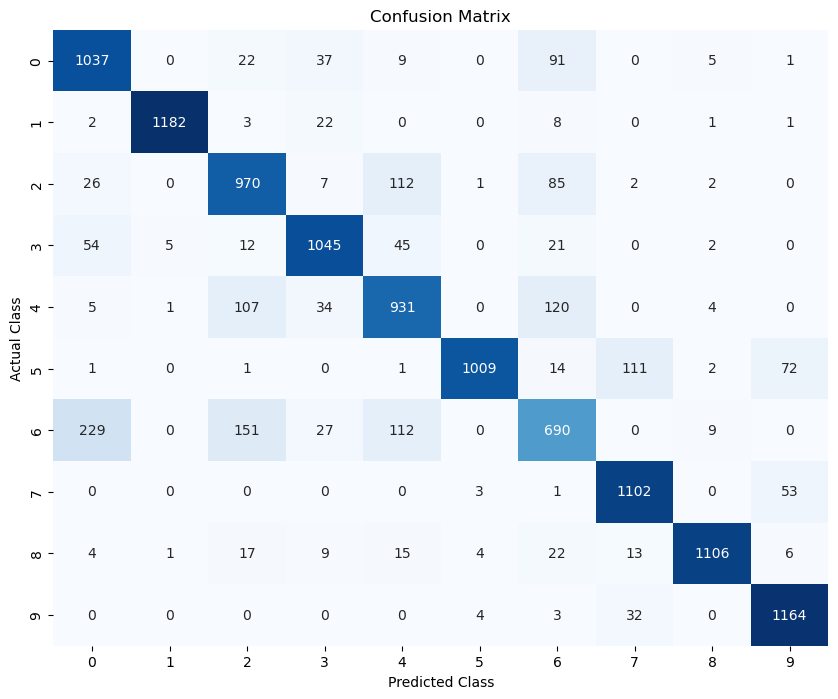

In [20]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()


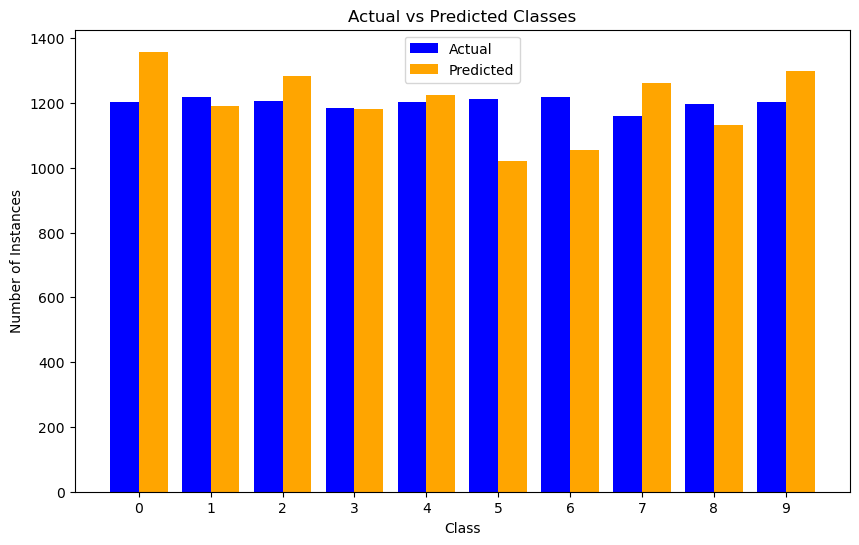

In [21]:

# Count the number of instances in each class for y_test and y_pred
unique_classes, counts_test = np.unique(y_test, return_counts=True)
unique_classes, counts_pred = np.unique(y_pred, return_counts=True)

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(unique_classes - 0.2, counts_test, width=0.4, label='Actual', color='blue', align='center')
plt.bar(unique_classes + 0.2, counts_pred, width=0.4, label='Predicted', color='orange', align='center')
plt.xticks(unique_classes, unique_classes)
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Actual vs Predicted Classes')
plt.legend()
plt.show()


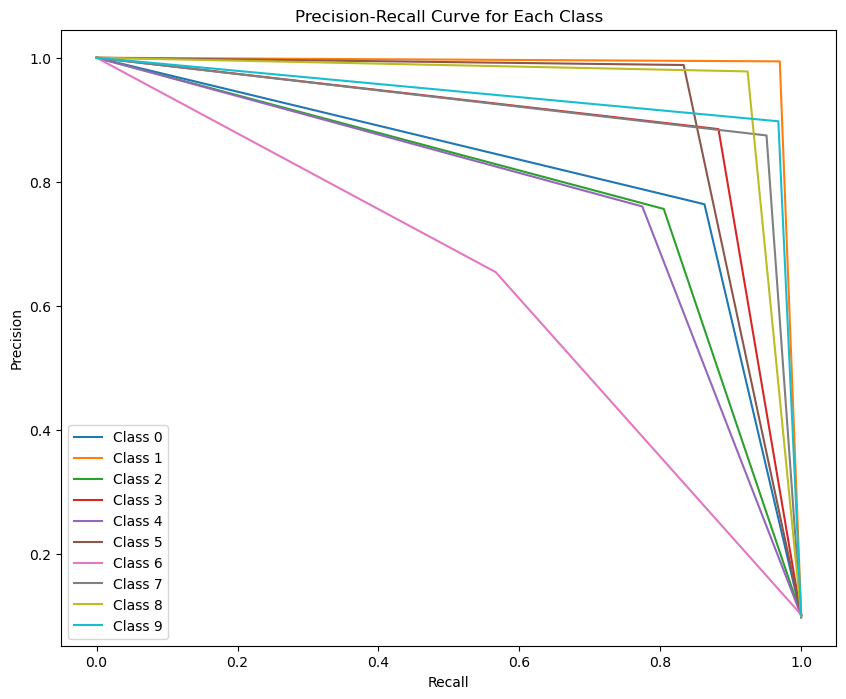

In [22]:

# Get the precision and recall for each class
precisions = dict()
recalls = dict()
thresholds = dict()
for i in range(len(np.unique(y_test))):
    precisions[i], recalls[i], thresholds[i] = precision_recall_curve((y_test == i).astype(int), (y_pred == i).astype(int))

# Plot the precision-recall curves for each class
plt.figure(figsize=(10, 8))
for i in range(len(np.unique(y_test))):
    plt.plot(recalls[i], precisions[i], label='Class {}'.format(i))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend()
plt.show()
